# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

581

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# Api_keys information:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}&units={units}&appid={weather_api_key}&q="

# Performing a weather check on city using a series of API calls:

# Setting list for the loop call:
city_data = []
city_lat = []
city_lng = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []


# Print to logger:
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Creating counters for printing log:
record_count = 1
set_count = 1


# Looping through all the cities in our list and performing a request:
for i, city in enumerate(cities):
       
    # Create the endpoint query_url with each city:
    city_url = query_url + city
    
    
    # Grouping cities in sets of 50 for with counters we set for printing log:
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
      
    # Printing records with set numbers and counters:
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Adding 1 to the record count for printing:
    record_count += 1

    # Running the API request for each of the cities 
    # (Using try & except)
    try:
        
        # Make request and store in json
        response = requests.get(city_url).json()
        
        
        city_data.append(response["name"])
        city_lat.append(response["coord"]["lat"])
        city_lng.append(response["coord"]["lon"])
        city_max_temp.append(response["main"]["temp_max"])
        city_humidity.append(response["main"]["humidity"])
        city_clouds.append(response["clouds"]["all"])
        city_wind.append(response["wind"]["speed"])
        city_country.append(response["sys"]["country"])
        city_date.append(response["dt"])
        
        # Suspension time to prevent api from getting locked
        time.sleep(2)
        
    # Handle exceptions for experienced error, skip the city:
    except:
        # Append null values
        print("City not found. Skipping...")
        pass 
    
# Include a print log of each city as it'sbeing processed (with the city number and city name)              
# Print when data loading is complete: 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | zhob
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | koshurnikovo
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | fortuna
Processing Record 9 of Set 1 | sindor
Processing Record 10 of Set 1 | ranong
Processing Record 11 of Set 1 | deputatskiy
Processing Record 12 of Set 1 | campbellsville
Processing Record 13 of Set 1 | poum
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | katsuura
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | olinda
Processing Record 18 of Set 1 | pasni
Processing Record 19 of Set 1 | norman wells
Processing Record 20 of Set 1 | parry sound
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | cabo san lucas
Processing Record 23 of Set 1 | lebu
Proc

Processing Record 39 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 40 of Set 4 | padre bernardo
Processing Record 41 of Set 4 | kununurra
Processing Record 42 of Set 4 | hvammstangi
City not found. Skipping...
Processing Record 43 of Set 4 | muncar
Processing Record 44 of Set 4 | butaritari
Processing Record 45 of Set 4 | kuching
Processing Record 46 of Set 4 | chuy
Processing Record 47 of Set 4 | myaundzha
Processing Record 48 of Set 4 | dudinka
Processing Record 49 of Set 4 | hithadhoo
Processing Record 0 of Set 5 | urumqi
Processing Record 1 of Set 5 | trairi
Processing Record 2 of Set 5 | muros
Processing Record 3 of Set 5 | coquimbo
Processing Record 4 of Set 5 | gotsu
Processing Record 5 of Set 5 | beloha
Processing Record 6 of Set 5 | oro valley
Processing Record 7 of Set 5 | kawalu
Processing Record 8 of Set 5 | yar-sale
Processing Record 9 of Set 5 | bengkulu
Processing Record 10 of Set 5 | marystown
Processing Record 11 of Set 5 | mapiri
Processing Rec

Processing Record 25 of Set 8 | puerto del rosario
Processing Record 26 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 27 of Set 8 | nzerekore
Processing Record 28 of Set 8 | ostroleka
Processing Record 29 of Set 8 | puerto escondido
Processing Record 30 of Set 8 | muroto
Processing Record 31 of Set 8 | xining
Processing Record 32 of Set 8 | duldurga
Processing Record 33 of Set 8 | pringsewu
Processing Record 34 of Set 8 | hualmay
Processing Record 35 of Set 8 | itarema
Processing Record 36 of Set 8 | sola
Processing Record 37 of Set 8 | sibolga
Processing Record 38 of Set 8 | sinnamary
Processing Record 39 of Set 8 | lorengau
Processing Record 40 of Set 8 | alofi
Processing Record 41 of Set 8 | hoi an
Processing Record 42 of Set 8 | salt
Processing Record 43 of Set 8 | clinton
Processing Record 44 of Set 8 | yirol
City not found. Skipping...
Processing Record 45 of Set 8 | padang
Processing Record 46 of Set 8 | tyrma
Processing Record 47 of Set 8 | sinazongwe
Proc

Processing Record 16 of Set 12 | hofn
Processing Record 17 of Set 12 | saint john
Processing Record 18 of Set 12 | moctezuma
Processing Record 19 of Set 12 | havoysund
Processing Record 20 of Set 12 | merritt
Processing Record 21 of Set 12 | lira
Processing Record 22 of Set 12 | port moresby
Processing Record 23 of Set 12 | sa kaeo
Processing Record 24 of Set 12 | zmeinogorsk
Processing Record 25 of Set 12 | natal
Processing Record 26 of Set 12 | ryabovo
Processing Record 27 of Set 12 | plettenberg bay
Processing Record 28 of Set 12 | naze
Processing Record 29 of Set 12 | tilichiki
Processing Record 30 of Set 12 | umzimvubu
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Creating new dataframe for cities data:
city_data_df ={
    "City": city_data, 
    "Latitude": city_lat, 
    "Longitude": city_lng, 
    "Max Temp": city_max_temp,
    "Humidity": city_humidity,
    "Cloudiness": city_clouds,
    "Wind Speed": city_wind,
    "Country": city_country,
     "Date": city_date}

weather_df = pd.DataFrame(city_data_df)
weather_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,22.89,73,100,9.86,PF,1660209281
1,Port Alfred,-33.5906,26.8910,17.88,82,100,0.45,ZA,1660209283
2,Hobart,-42.8794,147.3294,11.92,83,75,3.09,AU,1660209213
3,Zhob,31.3411,69.4481,32.59,35,44,3.11,PK,1660209288
4,Nikolskoye,59.7035,30.7861,24.37,41,99,4.68,RU,1660209290


In [5]:
# Exporting the city data to .csv file:

weather_df.to_csv("output_data/city_weather.csv", index=False, header=True)

weather_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,5.390000e+02
mean,20.492333,20.165572,21.148015,69.690167,57.821892,3.529555,1.660210e+09
std,33.126110,91.412303,8.272227,21.812025,39.032607,2.593510,3.591245e+02
min,-54.800000,-175.200000,-0.940000,1.000000,0.000000,0.000000,1.660209e+09
25%,-6.280250,-63.112250,15.170000,55.000000,18.000000,1.540000,1.660210e+09
50%,26.541200,27.461800,22.320000,75.000000,74.000000,3.000000,1.660210e+09
75%,48.392500,103.020600,27.165000,87.000000,99.000000,4.715000,1.660210e+09
max,78.218600,179.316700,44.290000,100.000000,100.000000,17.490000,1.660210e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
over_100 = weather_df[weather_df.Humidity > 100].index
over_100

Int64Index([], dtype='int64')

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df
for x in over_100:
    clean_city_data = weather_df.drop([x])
clean_city_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,22.89,73,100,9.86,PF,1660209281
1,Port Alfred,-33.5906,26.8910,17.88,82,100,0.45,ZA,1660209283
2,Hobart,-42.8794,147.3294,11.92,83,75,3.09,AU,1660209213
3,Zhob,31.3411,69.4481,32.59,35,44,3.11,PK,1660209288
4,Nikolskoye,59.7035,30.7861,24.37,41,99,4.68,RU,1660209290


## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [8]:
# Extract relevant fields from the cleaned dataframe
lat = clean_city_data .Latitude
max_temp = clean_city_data ["Max Temp"]
humid = clean_city_data.Humidity
cloud = clean_city_data.Cloudiness
wind = clean_city_data["Wind Speed"]

# Export the clean_city_data into a csv:
clean_city_data.to_csv("output_data/clean_city_data.csv", index=False, header=True)

## Latitude vs. Temperature Plot

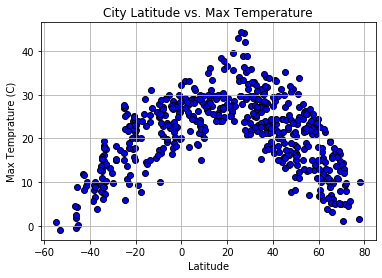

In [31]:
# Plot 1: Latitude vs. Temperature Plot
x_values = lat
y_values = max_temp

plt.scatter(x_values,y_values, marker = "o", facecolor = "blue", edgecolor="black")

plt.xlabel("Latitude")
plt.ylabel("Max Temprature (C)")
plt.title("City Latitude vs. Max Temperature")
plt.grid()
plt.savefig("Images/lat_vs_temp.png")
plt.show()

## Latitude vs. Humidity Plot

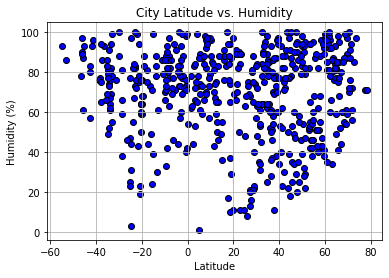

In [32]:
# Plot 2: Latitude vs. Humidity Plot
x_values = lat
y_values = humid

plt.scatter(x_values,y_values, marker = "o", facecolor = "blue", edgecolor="black")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid()
plt.savefig("Images/lat_vs_humid.png")
plt.show()

## Latitude vs. Cloudiness Plot

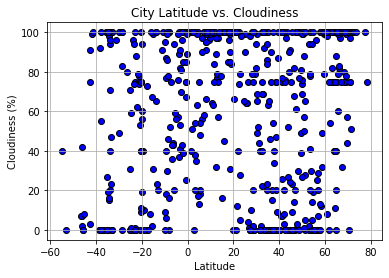

In [33]:
# Plot 3: Latitude vs. Cloudiness Plot
x_values = lat
y_values = cloud

plt.scatter(x_values,y_values, marker = "o", facecolor ="blue", edgecolor="black")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid()
plt.savefig("Images/lat_vs_cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

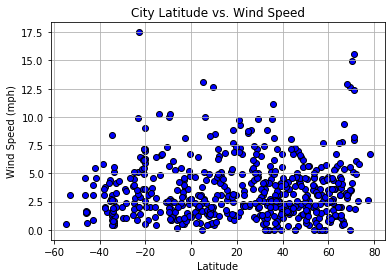

In [34]:
# Plot 4: Latitude vs. Wind Speed Plot
x_values = lat
y_values = wind

plt.scatter(x_values,y_values, marker = "o", facecolor = "blue", edgecolor="black")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed")
plt.grid()
plt.savefig("Images/lat_vs_wind.png")
plt.show()

## Linear Regression

In [15]:
# Create a function to create linear regression plots.
def createLinearRegressionPlot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label}")
    plt.annotate(line_eq,line_placement,fontsize=15,color="red")
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.savefig(f"./Images/{hemisphere}_{x_label}_vs_{y_label}.png", bbox_inches="tight")
    return plt.plot(x_values,regress_values,"r-")

In [16]:
# Creating northern and southern hemisphere dataframe for linear regression:
north_hemisphere = clean_city_data.loc[clean_city_data["Latitude"] >= 0]
south_hemisphere = clean_city_data.loc[clean_city_data["Latitude"] < 0]

###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.44518197151158867
The correlation between both factors is -0.67


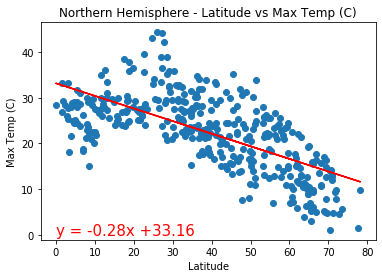

In [25]:
# Create a scatter plot for latitude vs max temp (northern hemisphere)
x_values = north_hemisphere["Latitude"]
y_values = north_hemisphere["Max Temp"]
createLinearRegressionPlot(x_values, y_values, "Latitude", "Max Temp (C)", "Northern",(0, 0))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5910591982492553
The correlation between both factors is 0.77


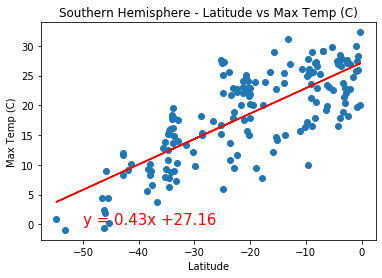

In [26]:
# Create a scatter plot for latitude vs max temp (southern hemisphere)
x_values = south_hemisphere["Latitude"]
y_values = south_hemisphere["Max Temp"]
createLinearRegressionPlot(x_values, y_values, "Latitude", "Max Temp (C)", "Southern",(-50, 0))

### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.002623535584440007
The correlation between both factors is 0.05


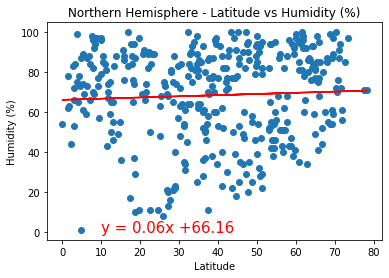

In [19]:
# Create a scatter plot for latitude vs humditiy (northern hemisphere)
x_values = north_hemisphere["Latitude"]
y_values = north_hemisphere["Humidity"]
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(10, 0))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.003621006366022821
The correlation between both factors is -0.06


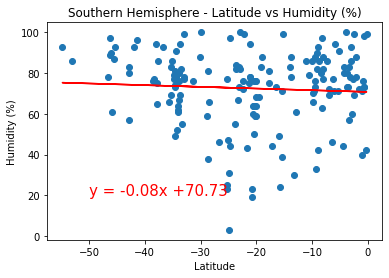

In [20]:
# Create a scatter plot for latitude vs humditiy (southern hemisphere)
x_values = south_hemisphere["Latitude"]
y_values = south_hemisphere["Humidity"]
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(-50, 20))

### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0016995509282146705
The correlation between both factors is -0.04


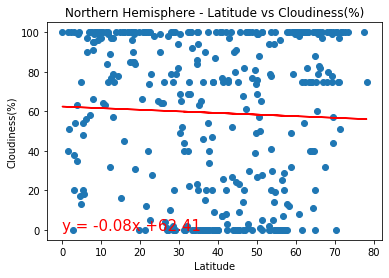

In [21]:
# Create a scatter plot for latitude vs cloudiness (northern hemisphere)
x_values = north_hemisphere["Latitude"]
y_values = north_hemisphere["Cloudiness"]
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Northern",(0, 0))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.056360592817105176
The correlation between both factors is 0.24


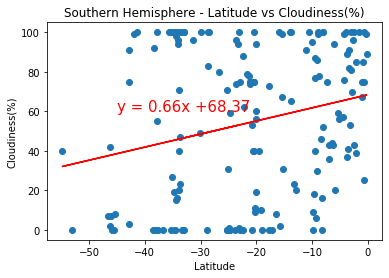

In [22]:
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = south_hemisphere["Latitude"]
y_values = south_hemisphere["Cloudiness"]
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))

### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00140630336880734
The correlation between both factors is 0.04


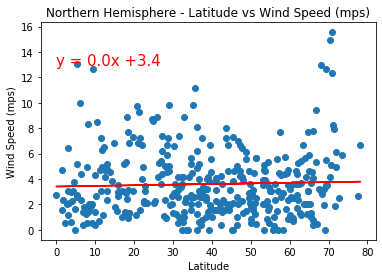

In [30]:
# Create a scatter plot for latitude vs wind speed(northern hemisphere)
x_values = north_hemisphere["Latitude"]
y_values = north_hemisphere["Wind Speed"]
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mps)", "Northern",(0, 13))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0030635309578684105
The correlation between both factors is 0.06


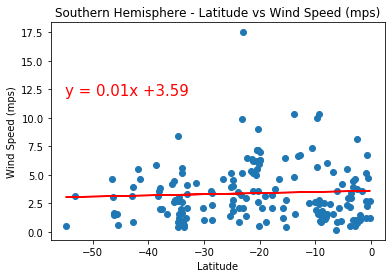

In [29]:
# Create a scatter plot for latitude vs wind speed (southern hemisphere)
x_values = south_hemisphere["Latitude"]
y_values = south_hemisphere["Wind Speed"]
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mps)", "Southern",(-55, 12))